# Python for (open) Neuroscience

_Lecture 1.5_ - More plotting

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture1.5_More-plotting.ipynb)

## More on plotting using `matplotlib`

Recap: the standard plotting library in Python is `matplotlib`.

In [7]:
import matplotlib.pyplot as plt  # import plotting library

import numpy as np
import pandas as pd

### Plotting functions in `matplotlib`

As we have seen, in `matplotlib` we call some plotting function (`plt.plot()`, `plt.scatter()`, `plt.matshow()`...) to make simple figures of various kinds

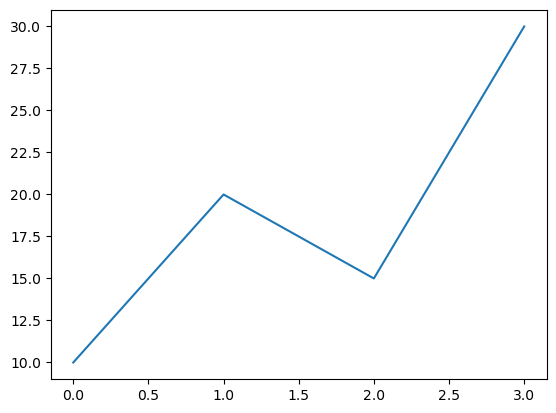

In [26]:
plt.plot([10, 20, 15, 30])

In [22]:
f = plt.figure(figsize=(3,2))  # the figsize argument controls the dimension

<Figure size 300x200 with 0 Axes>

### Functions to control plot aspect

We can control attributes of a simple plot with functions such as `plt.xlabel()` or `plt.xlim()`:

(0.0, 350.0)

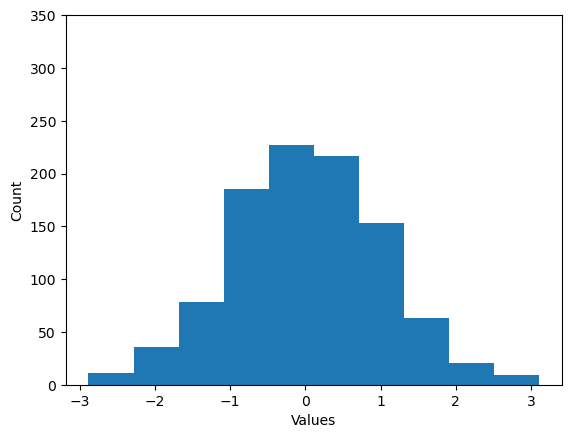

In [30]:
plt.hist(np.random.randn(1000))
plt.xlabel("Values")
plt.ylabel("Count")  
plt.ylim(0, 350)  # control y range

## Object oriented interface

To have a finer control over plots, `matplotlib` can be used in an object-oriented way, which can be more flexible and expressive.

This starts by creating a `plt.Figure` and `plt.Axis` object using the `plt.subplots()` function:

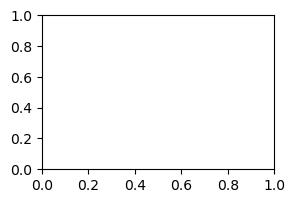

In [38]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object

In [39]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

if we leave `fig` as the last line of the notebook the `Figure` object is shown:

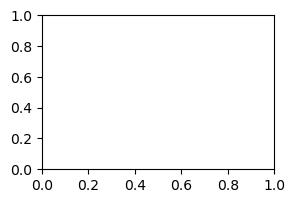

In [40]:
fig

### `Axis` method for plotting

`Axis` objects have methods to add plots: `ax.plot()`, `ax.scatter()`, `ax.imshow()`...

Exactly like the functions we saw above, but now called as methods from the axis we want to add the plots to:

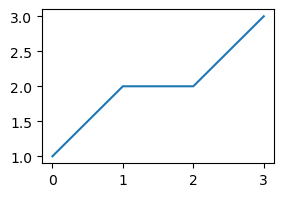

In [42]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object

# We can now call methods of the axis object:
ax.plot([1, 2, 2, 3])

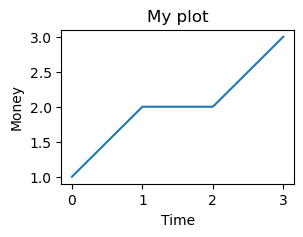

In [44]:
# We can modify the aspect of the axis using its methods:
ax.set(xlabel="Time", ylabel="Money", title="My plot")

# as we did the modification in a new cell, 
# to see the updated figure object we type it here again:
fig

My recommandation is to get used to the object oriented interface!

### Multiple plots on the same axis

We can add multiple rounds of data plots on the same axis

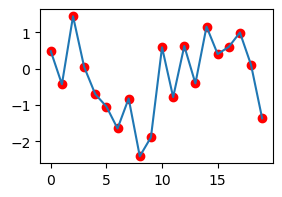

In [47]:
fig, ax = plt.subplots(figsize=(3,2))
data = np.random.randn(20)
ax.plot(data)
ax.scatter(np.arange(len(data)), data, c="red")

We can use the `zorder=` argument to specify the overlapping order

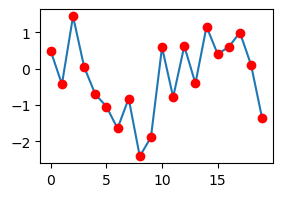

In [62]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(data)
ax.scatter(np.arange(len(data)), data, c="red", zorder=2)

### More plot elements: `plt.axvline()`/`plt.axhline()`

Useful to visualize lines for thresholds, stimulus onsets, etc.

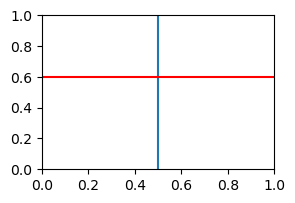

In [66]:
fig, ax = plt.subplots(figsize=(3,2))
ax.axvline(0.5)  # vertical line
ax.axhline(0.6, c="r")  # horizontal line

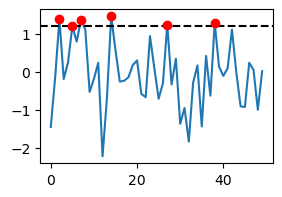

In [70]:
fig, ax = plt.subplots(figsize=(3,2))
data = np.random.normal(0, 1, 50)
thr = 1.2

ax.plot(data)
ax.axhline(thr, c="k", linestyle="dashed")  # horizontal line for threshold
ax.scatter(np.argwhere(data > thr), data[np.argwhere(data > thr)], c="r", zorder=2)

### `plt.axhspan()`/`plt.axvspan()`

Highlight areas in the plot:

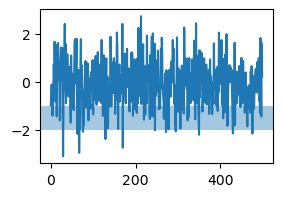

In [73]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(np.random.normal(0, 1, 500))
ax.axhspan(-1, -2, alpha=0.4)  # vertical band

We can customize "edge" (borders) and "face" (inner part) appearance:

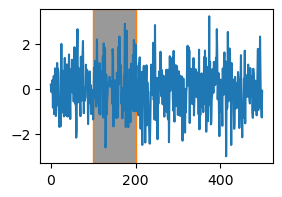

In [76]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(np.random.normal(0, 1, 500))

ax.axvspan(100, 200, fc=".6",  ec="C1")  # fc: facecolor; ec: edgecolor

### Plot customization

### Color names

Refer to colors in `matplotlib`:

- default colors: `"C0"`, `"C1"`, `"C2"`...

- Endless shades of gray: `".3"` `".5"` `".7"`...

- color name: `"red"`, `"green"`, `"maroon"`, `"teal"`...(list [here](https://matplotlib.org/stable/gallery/color/named_colors.html))
- normalized rgb value (between 0 and 1): `(0.8, 0.1, 0.2)`...

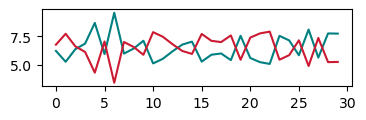

In [12]:
plt.figure(figsize=(4, 1))
plt.plot(data1, c="teal")
plt.plot(data2, c=(0.8, 0.1, 0.2))
plt.show()

### Configuration files

Matplotlib has a bunch of different styles that you can choose from. Check them out [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)!

In [77]:
# To switch styles:
plt.style.use('dark_background')

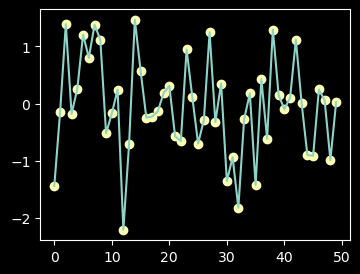

In [79]:
plt.figure(figsize=(4, 3))
plt.plot(data)
plt.scatter(np.arange(len(data)), data, c="C1")
plt.show()

In [82]:
plt.style.use('default') # restore default

Practicals 1.5.0

## Matplotlib subplots

Using `plt.subplots()` we can also create a figure with multiple panels:

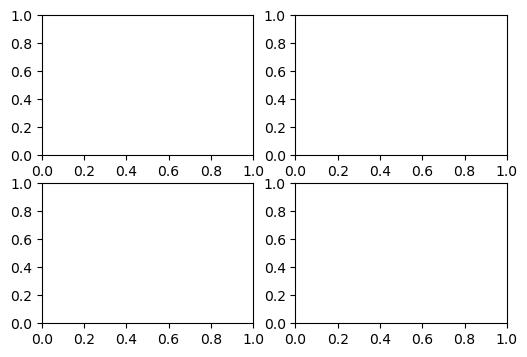

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

## A `np.array` of axes

Now axes will be a 2x2 array `numpy` array of axis objects!

In [84]:
type(axes)

numpy.ndarray

In [85]:
axes.shape

(2, 2)

In [78]:
type(axes[0, 0])  # elements inside the array will be axes

matplotlib.axes._axes.Axes

## Indexing and plotting

To plot on each of the axes, we first select an axis using indexing, and then we call its methods to plot:

In [87]:
axes[0, 0]  # access one subplot from the grid. From here we can plot using plotting methods

<Axes: >

So we first index the correct axis, and then we use its plotting method:

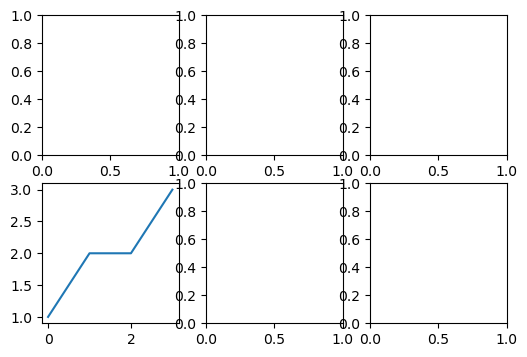

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4)) # 2 x 3 grid

axes[1, 0].plot([1, 2, 2, 3])  # plot something in second row, first column:

It is easy to iterate over multiple axes:

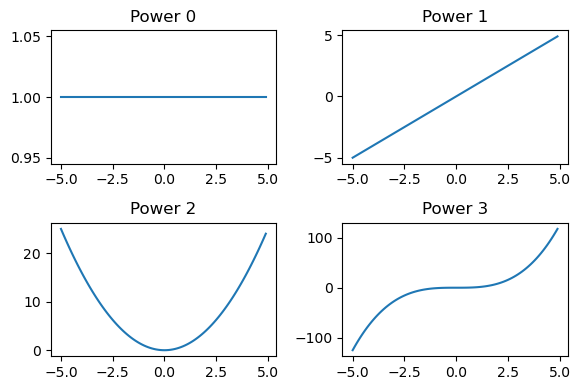

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
x = np.arange(-5, 5, 0.1)

# Double loop over rows and columns
for col_idx  in range(2):
    for row_idx in range(2):
        current_axis = axes[row_idx, col_idx] # Select one axis
        i = col_idx + row_idx*2
        current_axis.plot(x, x**i)  # Plot on it
        current_axis.set(title=f"Power {i}")  # Set title
        
## cleaner alternative to go through all plots in a single loop:
# for i in range(4):
#     current_axis = axes.flat[i]
#     ...   

plt.tight_layout()  # This function separate plots better

## Saving plots

From matplotlib we can export both `pdf`s (recommended! vector images) and `png`s for our plots

In [96]:
fig.savefig("/Users/vigji/Desktop/test_img.pdf")  # save pdf
fig.savefig("/Users/vigji/Desktop/test_img.png")  # save png

In [ ]:
# If you are working with google colab, you need an additional step to download the image
# on your computer:

from google.colab import files
plt.savefig("filename.png")
files.download("filename.png")  # download on your pc file from (virtual) Colab folder

Practicals 1.5.1

## Advanced plotting with `seaborn`


`seaborn` is an advanced plotting library that offers some special plotting functions and powerful integration with `pandas`

In [1]:
import seaborn as sns

import pandas as pd

Let's take our usual pandas dataframe with datapoints and groups information:

In [120]:
data_df = pd.read_csv("/Users/vigji/code/python-cimec-2024/lectures/files/swarmplot_data.csv")

## `sns.swarmplot()`

Swarmplots are very useful to represent efficiently many individual datapoints

(Instead of dynamite plots! Blow up dynamite plots!)

<Axes: xlabel='label', ylabel='data'>

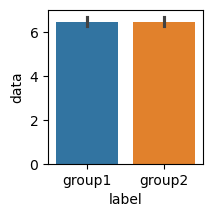

In [118]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.barplot(data_df, x="label",
            y="data", 
            hue="label",
            errorbar="se")

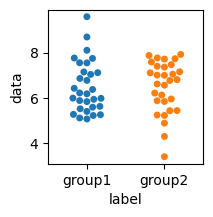

In [119]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.swarmplot(data_df, x="label",
              hue="label",
              y="data")
plt.show()

[Public service campaign]

    Respect each data point! 
  
They're costly and painful to get. If they're not out in your chart (and/or publicly available) they are lost forever!

### `sns.violinplot()`

Violin plots use kernel density estimation (KDE) instead of histograms.

KDE is a way of estimating a continuous probability distribution from many many samples (my recommandation: use only with > 100s of points!)

<Axes: xlabel='data', ylabel='label'>

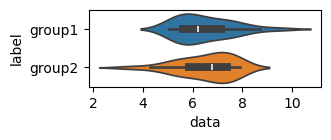

In [67]:
plt.figure(figsize=(3, 1))
sns.violinplot(data_df, x="data", y="label", hue="label", orient="h")

To transparently show distributions, we can also overlay individual datapoints and distribution estimations (violin plots, boxplots, etc):

<Axes: xlabel='data', ylabel='label'>

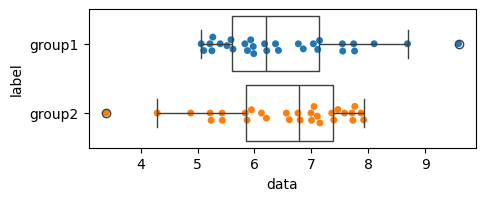

In [78]:
plt.figure(figsize=(5, 1.8))
sns.swarmplot(data_df, x="data", y="label", hue="label", 
              orient="h", zorder=-1)
sns.boxplot(data_df, x="data", y="label", hue="label",
            boxprops={'facecolor':'none'}, orient="h")

### Combine `matplotlib` and `seaborn`

`seaborn` and `matplotlib` can be combined together in the same panels.

To use a `seaborn` function with some given `axis` object, we can pass it as the `ax=` argument

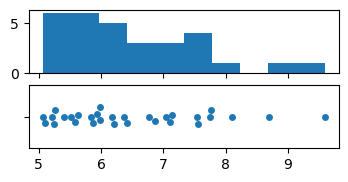

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(4, 1.8), sharex=True)

# we are passing the ax= argument to put the swarmplot in the second axis:
sns.swarmplot(data1, orient="h", ax=axs[1])
axs[0].hist(data1)
plt.show()

## Using `seaborn` for multi-layered plots

`seaborn` has been developed to read as much information as possible from properly formatted `pandas.DataFrame`s! 

It offers out-of-the box tools to show many kind of data.

In [114]:
subjects_df = pd.read_csv("/Users/vigji/code/python-cimec-2024/lectures/files/seaborn_df.csv")

<Axes: xlabel='age', ylabel='genotype'>

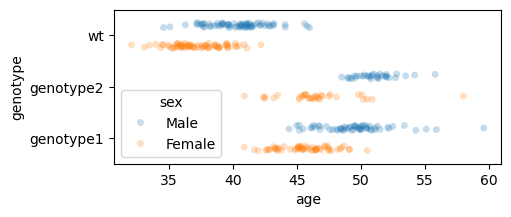

In [115]:
# Show each observation with a scatterplot
plt.figure(figsize=(5, 2))
sns.stripplot(
    data=subjects_df, x="age", y="genotype", hue="sex",
    dodge=True, alpha=.25, zorder=1, legend=True,
)

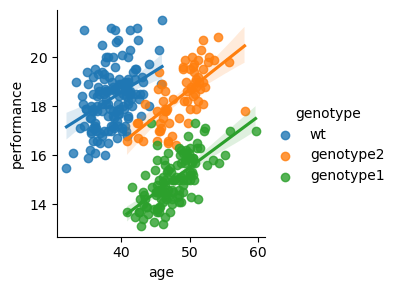

In [116]:
g = sns.lmplot(
    data=subjects_df,
    x="age", y="performance", hue="genotype",
    height=3
)

Many more examples in the gallery 
[https://seaborn.pydata.org/examples/index.html](here)

Fore some data visualization tips:

https://github.com/cxli233/FriendsDontLetFriends

Practicals 1.5.2